In [2]:
# Download the Repository 
# !git clone "https://github.com/prithsha/erav2-session-11-plus.git"


In [3]:
# Change to working directory as needed
# %cd /content/<>

In [4]:
# Install the requirements
# !pip install -r ./requirements.txt

In [5]:
import main
from utility import cifar10Utility
from utility import imageAugmentationUtility
from utility import imageVisualizationUtility

Failed to get terminal size using stty


In [6]:

train_transforms, test_transforms = imageAugmentationUtility.get_cifar10_train_and_test_transforms(cifar10Utility.get_mean(),
                                                                                                   cifar10Utility.get_std())



In [7]:
BATCH_SIZE = 512
DATA_FOLDER = "./data"

train_dataset, test_dataset = cifar10Utility.get_datasets(train_transforms_collection=train_transforms,
                                                                   test_transforms_collection=test_transforms,
                                                                    data_folder=DATA_FOLDER)
train_loader, test_loader = cifar10Utility.get_dataloaders(train_dataset=train_dataset,
                                                                    test_dataset=test_dataset,
                                                                    batch_size=BATCH_SIZE)

Files already downloaded and verified
Files already downloaded and verified
Shape of test_dataloader batch_data [Batch, C, H, W]: torch.Size([512, 3, 32, 32])
Shape of test_dataloader label (label): torch.Size([512]) torch.int64


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

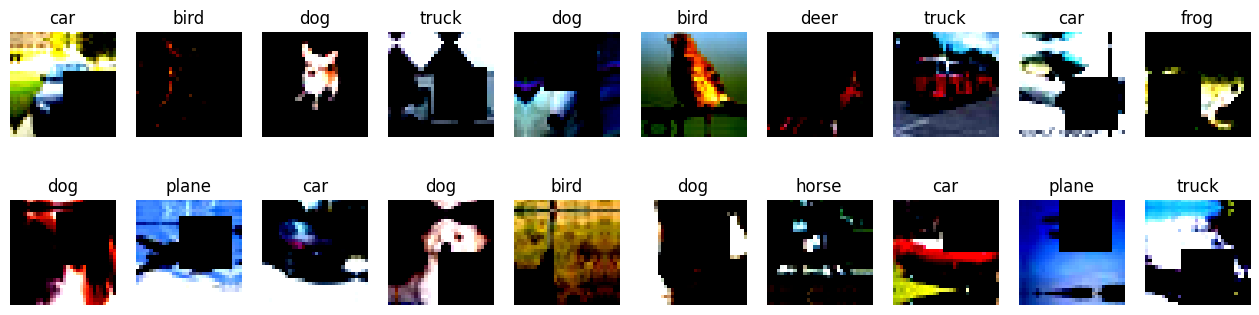

In [8]:
imageVisualizationUtility.randomly_show_images_from_tensor_array(train_dataset, cifar10Utility.get_image_classes(), fig_size=(16,4))

In [9]:
from utility import utils
model = main.get_model_instance(model_type=main.ModelType.RESNET18)
optimizer = main.get_adam_optimizer(model)
criterion = main.get_cross_entropy_loss_criteria()


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [10]:
EPOCHS = 5
optimal_learning_rate = utils.find_optimal_learning_rate(train_loader,model, optimizer, criterion)
scheduler = main.get_one_cycle_lr_scheduler(optimizer, max_lr=optimal_learning_rate,
                                            pct_start=5/EPOCHS, steps_per_epoch=len(train_loader), epochs=EPOCHS)

TypeError: find_optimal_learning_rate() missing 2 required positional arguments: 'optimizer' and 'criterion'

In [ ]:

model_executor = main.NetworkModelEvaluator(train_loader, test_loader)
model_executor.execute(epochs=EPOCHS, model=model, criterion=criterion,
                       optimizer=optimizer, scheduler=scheduler)

In [ ]:
model_executor.show_train_and_test_accuracy_and_losses()

In [ ]:
print(f"----****----Wrongly predicted test images: {len(model_executor.wrongly_predicted_test_images)}")
imageVisualizationUtility.show_images_from_tensor_array(list(model_executor.wrongly_predicted_test_images), cifar10Utility.get_image_classes(), shape=(2,10))

print(f"----****----Wrongly predicted train images: {len(model_executor.wrongly_predicted_trained_images)}")
imageVisualizationUtility.show_images_from_tensor_array(list(model_executor.wrongly_predicted_trained_images), cifar10Utility.get_image_classes(), shape=(2,10))

In [ ]:
module = model.module
target_layer = module.layer3
print(target_layer)

images = list(model_executor.wrongly_predicted_test_images)

In [ ]:
from pytorch_grad_cam import GradCAM
selected_image, label = images[13]
print(selected_image.size())
target_layers = module.layer3[-1]
print(target_layers)
cam = GradCAM(model=model, target_layers=[target_layers])

In [ ]:
from torchvision import models, transforms
from pytorch_grad_cam import GradCAM

def preprocess_image(image_data):
    transform = transforms.ToPILImage()
    image_data = transform(image_data)
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    return transform(image_data).unsqueeze(0)


selected_pil_image = preprocess_image(selected_image)


In [ ]:
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

targets  = ClassifierOutputTarget(9)
grayscale_cam = cam(input_tensor=selected_pil_image, targets=[targets])

print(grayscale_cam.shape)
grayscale_cam = grayscale_cam[0, :]
print(grayscale_cam.shape)



In [ ]:
from pytorch_grad_cam.utils.image import show_cam_on_image
import numpy as np

print(grayscale_cam.shape)


final_image = selected_pil_image.numpy() / 255
final_image = final_image.squeeze(0).transpose((1, 2, 0))

print(final_image.shape)
visualization = show_cam_on_image(final_image , grayscale_cam, use_rgb=True)

In [ ]:
visualization.shape

imageVisualizationUtility.show_image(selected_image.cpu(), label.cpu(), fig_size=(2,2))

imageVisualizationUtility.show_processed_images([(visualization,0)], [label], rows=1, cols=1, fig_size=(2,2))
